# Demo 3 - Convolutional Neural Networks usando Keras e Ckeras-introIFAR-10

### 1. Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

*** Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

#### FIAP - Matéria: Deep Learning 2 - Ahirton Lopes

Integrantes:

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Ariel Rodrigues             | RM 331163      | `2IA` |
| Duan Nunes             | RM 330648      | `2IA` |
| Jenifer Caroline             | RM 330720      | `2IA` |
| Juliana Fatima            | RM 330985      | `2IA` |

In [1]:
import keras
from keras.datasets import cifar10

#carregando o dataset pré-embaralhado de treinamento bem como os dados de teste
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualizando as primeiras 24 imagens do dataset de treinamento

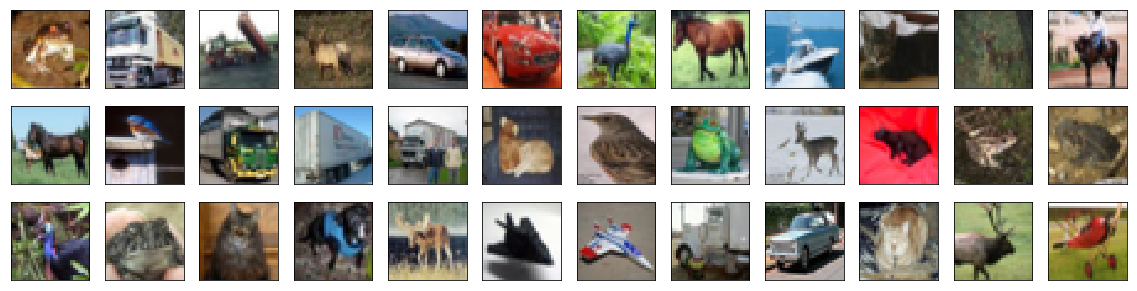

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [0]:
# redimensionamento [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

In [4]:
from keras.utils import np_utils

# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino
print('x_train shape:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

# Teste 1

Primeiro teste de arquitetura de CNN para classificação de imagens. 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_1 = Sequential()
model_1.add(Conv2D(filters=32, 
                   kernel_size=2, 
                   padding='same', 
                   activation='relu', 
                   input_shape=(32, 32, 3)))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Conv2D(filters=64, 
                   kernel_size=2, 
                   padding='same', 
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Conv2D(filters=128, 
                   kernel_size=2, 
                   padding='same', 
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))

model_1.add(Dropout(0.1))
model_1.add(Flatten())
model_1.add(Dense(100, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='sigmoid'))

# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/

model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_3 (MaxP

### Compilando o modelo

In [0]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/
model_1.compile(loss='categorical_crossentropy', 
                optimizer='SGD',  # De rmsprop para SGD
                metrics=['accuracy'])

### Treinando o modelo

In [7]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model_1.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

hist = model_1.fit(x_train, 
                 y_train, 
                 batch_size=64, 
                 epochs=50, # de 10 para 50
                 validation_data=(x_valid, y_valid), 
                 callbacks=[checkpointer], 
                 verbose=2, 
                 shuffle=True)

# tentem mudar o número de épocas de treinamento e verificar o comportamento de nosso algoritmo

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/50
 - 9s - loss: 2.2975 - acc: 0.1155 - val_loss: 2.2884 - val_acc: 0.1586

Epoch 00001: val_loss improved from inf to 2.28841, saving model to model_1.weights.best.hdf5
Epoch 2/50
 - 7s - loss: 2.2656 - acc: 0.1643 - val_loss: 2.2080 - val_acc: 0.2342

Epoch 00002: val_loss improved from 2.28841 to 2.20801, saving model to model_1.weights.best.hdf5
Epoch 3/50
 - 7s - loss: 2.1351 - acc: 0.2154 - val_loss: 2.0694 - val_acc: 0.2182

Epoch 00003: val_loss improved from 2.20801 to 2.06942, saving model to model_1.weights.best.hdf5
Epoch 4/50
 - 7s - loss: 2.0327 - acc: 0.2493 - val_loss: 1.9475 - val_acc: 0.2800

Epoch 00004: val_loss improved from 2.06942 to 1.94752, saving model to model_1.weights.best.hdf5
Epoch 5/50
 - 7s - loss: 1.9690 - acc: 0.2741 - val_loss: 1.8744 - val_acc: 0.3218

Epoch 00005: val_loss improved from 1.94752 to 1.87444, saving model to model_1.weights.best.hd

### Validando modelo

In [8]:
# carregando os pesos que geraram a melhor precisão de validação
model_1.load_weights('model_1.weights.best.hdf5')

loss, accuracy = model_1.evaluate(x_test, 
                                  y_test, 
                                  verbose=True)
print('Test loss: {0}'.format(loss))
print('Test accuracy: {0}'.format(accuracy))

10000/10000 [==============================] - 1s 113us/step
Test loss: 1.21463347092
Test accuracy: 0.57


# Teste 2

Alterando algumas configurações na arquitetura da rede podemos analisar se a acurácia é melhorada.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_2 = Sequential()
model_2.add(Conv2D(filters=32, 
                   kernel_size=2, 
                   padding='same', 
                   activation='relu', 
                   input_shape=(32, 32, 3)))
model_2.add(MaxPooling2D(pool_size=2))

# 20% de dropout
model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='relu'))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               819300    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total para

### Compilando o modelo

In [0]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop',  # rmsprop
                metrics=['accuracy'])

### Treinando o modelo

In [11]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model_2.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

hist = model_2.fit(x_train, 
                  y_train, 
                  batch_size=64, 
                  epochs=25, # Para 25
                  validation_data=(x_valid, y_valid), 
                  callbacks=[checkpointer], 
                  verbose=2, 
                  shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 7s - loss: 2.4062 - acc: 0.2385 - val_loss: 2.0505 - val_acc: 0.4046

Epoch 00001: val_loss improved from inf to 2.05046, saving model to model_2.weights.best.hdf5
Epoch 2/25
 - 7s - loss: 2.2478 - acc: 0.3461 - val_loss: 2.0320 - val_acc: 0.3992

Epoch 00002: val_loss improved from 2.05046 to 2.03201, saving model to model_2.weights.best.hdf5
Epoch 3/25
 - 6s - loss: 2.3176 - acc: 0.3615 - val_loss: 2.0873 - val_acc: 0.4558

Epoch 00003: val_loss did not improve from 2.03201
Epoch 4/25
 - 6s - loss: 2.3883 - acc: 0.3611 - val_loss: 2.2501 - val_acc: 0.4184

Epoch 00004: val_loss did not improve from 2.03201
Epoch 5/25
 - 6s - loss: 2.4624 - acc: 0.3563 - val_loss: 2.3431 - val_acc: 0.4254

Epoch 00005: val_loss did not improve from 2.03201
Epoch 6/25
 - 7s - loss: 2.4848 - acc: 0.3426 - val_loss: 2.0381 - val_acc: 0.2862

Epoch 00006: val_loss did not improve from 2.03201
Epoch 7/25
 - 6s - loss: 2.4951 - acc: 0.3237 - val

### Validando modelo

In [12]:
# carregando os pesos que geraram a melhor precisão de validação
model_2.load_weights('model_2.weights.best.hdf5')

loss, accuracy = model_2.evaluate(x_test, 
                                  y_test, 
                                  verbose=True)
print('Test loss: {0}'.format(loss))
print('Test accuracy: {0}'.format(accuracy))

10000/10000 [==============================] - 1s 95us/step
Test loss: 1.97716013546
Test accuracy: 0.3705


# Teste 3

Último teste para escolha do modelo ideal de rede para nosso problema de classificação.

### Configuração de Arquitetura da rede

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_3 = Sequential()
model_3.add(Conv2D(filters=32, 
                   kernel_size=2, 
                   padding='same', 
                   activation='tanh', 
                   input_shape=(32, 32, 3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters=64, 
                   kernel_size=2, 
                   padding='same', 
                   activation='tanh'))
model_3.add(MaxPooling2D(pool_size=2))

model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='sigmoid'))

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

### Compilando o modelo

In [0]:
model_3.compile(loss='mean_squared_error', 
                optimizer='SGD',  # De rmsprop para SGD
                metrics=['accuracy'])

### Treinando o modelo

In [15]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model_3.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

hist = model_3.fit(x_train, 
                  y_train, 
                  batch_size=128, # Alterado o batch
                  epochs=25,      # de 10 para 50
                  validation_data=(x_valid, y_valid), 
                  callbacks=[checkpointer], 
                  verbose=2, 
                  shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 6s - loss: 0.1194 - acc: 0.1006 - val_loss: 0.0919 - val_acc: 0.1014

Epoch 00001: val_loss improved from inf to 0.09194, saving model to model_3.weights.best.hdf5
Epoch 2/25
 - 5s - loss: 0.0938 - acc: 0.1029 - val_loss: 0.0911 - val_acc: 0.1046

Epoch 00002: val_loss improved from 0.09194 to 0.09107, saving model to model_3.weights.best.hdf5
Epoch 3/25
 - 5s - loss: 0.0934 - acc: 0.1050 - val_loss: 0.0909 - val_acc: 0.1138

Epoch 00003: val_loss improved from 0.09107 to 0.09093, saving model to model_3.weights.best.hdf5
Epoch 4/25
 - 5s - loss: 0.0932 - acc: 0.1075 - val_loss: 0.0908 - val_acc: 0.1292

Epoch 00004: val_loss improved from 0.09093 to 0.09081, saving model to model_3.weights.best.hdf5
Epoch 5/25
 - 5s - loss: 0.0931 - acc: 0.1070 - val_loss: 0.0907 - val_acc: 0.1324

Epoch 00005: val_loss improved from 0.09081 to 0.09071, saving model to model_3.weights.best.hdf5
Epoch 6/25
 - 5s - loss: 0.0930 - acc: 0.1104

### Validando o modelo

In [16]:
# carregando os pesos que geraram a melhor precisão de validação
model_3.load_weights('model_3.weights.best.hdf5')

loss, accuracy = model_3.evaluate(x_test, 
                                y_test, 
                                verbose=True)

print('Test loss: {0}'.format(loss))
print('Test accuracy: {0}'.format(accuracy))

10000/10000 [==============================] - 1s 108us/step
Test loss: 0.0890616243601
Test accuracy: 0.2116


# Teste 4

Último teste de configuração da rede antes da escolha final.

#### Configuração de Arquitetura da rede

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_4 = Sequential()

model_4.add(Conv2D(filters=32, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu', 
                 input_shape=(32, 32, 3)))
model_4.add(MaxPooling2D(pool_size=2))

model_4.add(Conv2D(filters=64, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu'))
model_4.add(MaxPooling2D(pool_size=2))

model_4.add(Conv2D(filters=128, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu'))
model_4.add(MaxPooling2D(pool_size=2))

model_4.add(Dropout(0.3))
model_4.add(Flatten())
model_4.add(Dense(100, activation='relu'))
model_4.add(Dropout(0.4))
model_4.add(Dense(10, activation='softmax'))

model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 128)         0         
__________

#### Compilando o modelo

In [0]:
model_4.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',  # Alterado para rmsprop
              metrics=['accuracy'])

#### Treinando o modelo

In [19]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model_4.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

hist = model_4.fit(x_train, 
                 y_train, 
                 batch_size=128, 
                 epochs=50, # de 10 para 50
                 validation_data=(x_valid, y_valid), 
                 callbacks=[checkpointer], 
                 verbose=2, 
                 shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
 - 7s - loss: 1.8069 - acc: 0.3440 - val_loss: 1.5543 - val_acc: 0.4390

Epoch 00001: val_loss improved from inf to 1.55432, saving model to model_4.weights.best.hdf5
Epoch 2/50
 - 6s - loss: 1.4749 - acc: 0.4698 - val_loss: 1.3489 - val_acc: 0.5164

Epoch 00002: val_loss improved from 1.55432 to 1.34892, saving model to model_4.weights.best.hdf5
Epoch 3/50
 - 6s - loss: 1.3193 - acc: 0.5290 - val_loss: 1.1475 - val_acc: 0.5936

Epoch 00003: val_loss improved from 1.34892 to 1.14745, saving model to model_4.weights.best.hdf5
Epoch 4/50
 - 6s - loss: 1.2125 - acc: 0.5727 - val_loss: 1.2467 - val_acc: 0.5452

Epoch 00004: val_loss did not improve from 1.14745
Epoch 5/50
 - 6s - loss: 1.1378 - acc: 0.5985 - val_loss: 1.0103 - val_acc: 0.6444

Epoch 00005: val_loss improved from 1.14745 to 1.01026, saving model to model_4.weights.best.hdf5
Epoch 6/50
 - 6s - loss: 1.0752 - acc: 0.6238 - val_loss: 0.9772 - val_acc: 0.6626

Epoch 00

#### Validando o modelo

In [20]:
# carregando os pesos que geraram a melhor precisão de validação
model_4.load_weights('model_4.weights.best.hdf5')

loss, accuracy = model_4.evaluate(x_test, 
                                  y_test, 
                                  verbose=True)

print('Test loss: {0}'.format(loss))
print('Test accuracy: {0}'.format(accuracy))

10000/10000 [==============================] - 1s 138us/step
Test loss: 0.733497496033
Test accuracy: 0.7559


### 8. Carregando o modelo com a melhor precisão de validação

In [0]:
# carregando os pesos que geraram a melhor precisão de validação, referentes ao teste 4

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu', 
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',  # Alterado para rmsprop
              metrics=['accuracy'])

### 9. Cálculo da precisão de classificação no dataset de testes

In [24]:
# carregando os pesos que geraram a melhor precisão de validação
model.load_weights('model_4.weights.best.hdf5')

loss, accuracy = model.evaluate(x_test, 
                                y_test, 
                                verbose=True)

print('Test loss: {0}'.format(loss))
print('Test accuracy: {0}'.format(accuracy))

10000/10000 [==============================] - 2s 154us/step
Test loss: 0.733497496033
Test accuracy: 0.7559


### 10. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [0]:
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

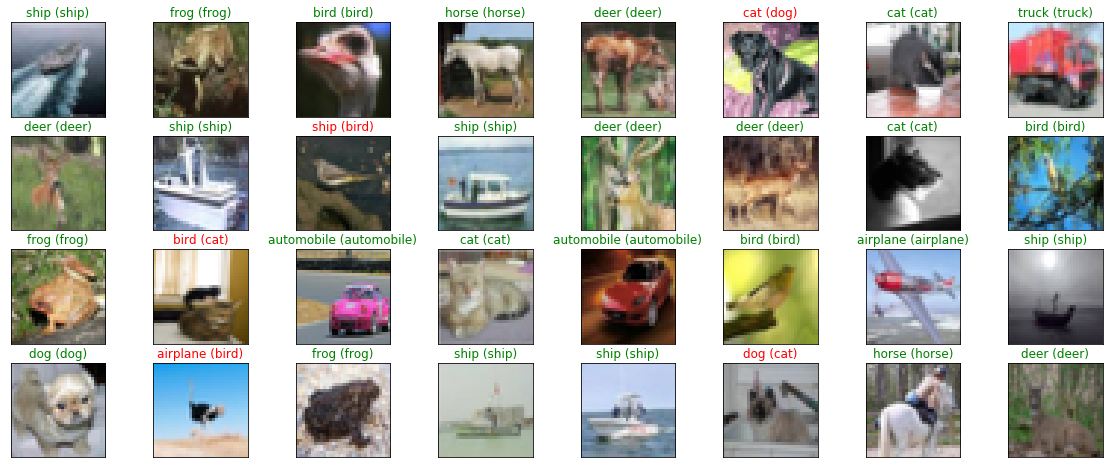

In [26]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
